In [ ]:
# def build_model():
#     # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
#     model = Sequential()
#     model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
#     print(model.layers)
#     model.add(LSTM(100, return_sequences=False))
#     model.add(Dense(output_dim=1))
#     model.add(Activation('linear'))

#     model.compile(loss='mse', optimizer='rmsprop')
#     return model


# def train_model(train_x, train_y, test_x, test_y):
#     model = build_model()

#     try:
#         model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)
#         predict = model.predict(test_x)
#         predict = np.reshape(predict, (predict.size, ))
#     except KeyboardInterrupt:
#         print(predict)
#         print(test_y)
#     print(predict)
#     print(test_y)
#     try:
#         fig = plt.figure(1)
#         plt.plot(predict, 'r:')
#         plt.plot(test_y, 'g-')
#         plt.legend(['predict', 'true'])
#     except Exception as e:
#         print(e)
#     return predict, test_y


# if __name__ == '__main__':
#     train_x, train_y, test_x, test_y, scaler = load_data('international-airline-passengers.csv')
#     train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
#     test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
#     predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
#     predict_y = scaler.inverse_transform([[i] for i in predict_y])
#     test_y = scaler.inverse_transform(test_y)
#     fig2 = plt.figure(2)
#     plt.plot(predict_y, 'g:')
#     plt.plot(test_y, 'r-')
#     plt.show()

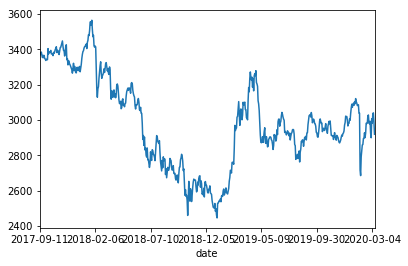

In [11]:
# import tushare as ts
# import matplotlib.pyplot as plt
# data=ts.get_hist_data('sh',ktype='d')
# data_all=data.open
# data_all=data_all.sort_index(axis=0)
# #print(data_all)
# data_all.plot()
# plt.show()

    

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Python\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Instructions for updating:
Colocations handled automatically by placer.


D:\Python\lib\site-packages\ipykernel\__main__.py:39: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Python\lib\site-packages\ipykernel\__main__.py:39: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`


Instructions for updating:
Use tf.cast instead.


D:\Python\lib\site-packages\ipykernel\__main__.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
D:\Python\lib\site-packages\ipykernel\__main__.py:52: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 427 samples, validate on 48 samples
Epoch 1/30
427/427 [==============================] - 2s 5ms/step - loss: 0.3514 - val_loss: 0.0929
Epoch 2/30
427/427 [==============================] - 0s 156us/step - loss: 0.1882 - val_loss: 0.0348
Epoch 3/30
427/427 [==============================] - 0s 151us/step - loss: 0.0856 - val_loss: 0.0034
Epoch 4/30
427/427 [==============================] - 0s 142us/step - loss: 0.0182 - val_loss: 0.0082
Epoch 5/30
427/427 [==============================] - 0s 150us/step - loss: 0.0107 - val_loss: 0.0024
Epoch 6/30
427/427 [==============================] - 0s 147us/step - loss: 0.0106 - val_loss: 0.0068
Epoch 7/30
427/427 [==============================] - 0s 161us/step - loss: 0.0093 - val_loss: 0.0024
Epoch 8/30
427/427 [==============================] - 0s 147us/step - loss: 0.0095 - val_loss: 0.0065
Epoch 9/30
427/427 [==============================] - 0s 154us/step - loss: 0.0089 - val_loss: 0.0025
Epoch 10/30
427/427 [==================

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


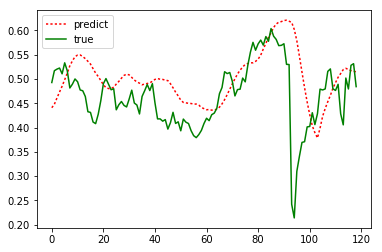

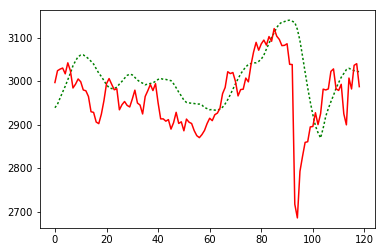

In [6]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation


data=ts.get_hist_data('sh',ktype='d')
data_open=data.open
data_open=data_open.sort_index(axis=0)

def load_data(data,sequence_length=10, split=0.8):
    data_all = np.array(data).astype(float)
    scaler = MinMaxScaler()
    data_all = scaler.fit_transform(data_all)
    data = []
    for i in range(len(data_all) - sequence_length - 1):
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')
#   np.random.shuffle(reshaped_data)
    # 对x进行统一归一化，而y则不归一化
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]

    train_y = y[: split_boundary]
    test_y = y[split_boundary:]
    return train_x, train_y, test_x, test_y, scaler

def build_model():
    # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
    model = Sequential()
    model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
    print(model.layers)
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model


def train_model(train_x, train_y, test_x, test_y):
    model = build_model()

    try:
        model.fit(train_x, train_y, batch_size=512, nb_epoch=30, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, ))
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
    print(predict)
    print(test_y)
    try:
        fig = plt.figure(1)
        plt.plot(predict, 'r:')
        plt.plot(test_y, 'g-')
        plt.legend(['predict', 'true'])
    except Exception as e:
        print(e)
    return predict, test_y

if __name__ == '__main__':
    train_x, train_y, test_x, test_y, scaler = load_data(data_open)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
    test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
    predict_y, test_y = train_model(train_x, train_y, test_x, test_y)
    predict_y = scaler.inverse_transform([[i] for i in predict_y])
    test_y = scaler.inverse_transform(test_y)
    fig2 = plt.figure(2)
    plt.plot(predict_y, 'g:')
    plt.plot(test_y, 'r-')
    plt.show()


In [22]:
arr=[[1,2,3],[4,5,6],[7,8,9]]
arr2=np.array(arr)
print(arr2[:,-1])
print(arr2[:,:-1])

[3 6 9]
[[1 2]
 [4 5]
 [7 8]]
